# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [11]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [16]:
heroes_df.drop(['Unnamed: 0'],inplace=True,axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [36]:
heroes_df.loc[heroes_df['Publisher'].isna() == True]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [20]:
print(heroes_df.info())
for col in heroes_df.columns:
    print(col, '\n', heroes_df[col].value_counts(normalize=True), '\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB
None
name 
 Goliath            0.004087
Spider-Man         0.004087
Blue Beetle        0.002725
Namor              0.002725
Atom               0.002725
                     ...   
Hydro-Man          0.001362
Ultron             0.001362
Crimson Dynamo     0.001362
Spider-Woman IV    0.001362
Speedball          0.001362
Name: name, Length: 715, dtype: float64 


Gender 
 Male      0.688011
Female    0.272480
-         0.039510
Name: Gender, dtype: float64 


Eye color 
 blue                       

In [24]:
print(powers_df.info(),'\n\n')
print(powers_df.isna().max())
for col in powers_df.columns:
    print(col, '\n', powers_df[col].value_counts(normalize=True), '\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None 


hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
                         ...  
Phoenix Force            False
Molecular Dissipation    False
Vision - Cryo            False
Omnipresent              False
Omniscient               False
Length: 168, dtype: bool
hero_names 
 Ammo                0.001499
Forge               0.001499
Quill               0.001499
Micah Sanders       0.001499
Ant-Man II          0.001499
                      ...   
Captain Midnight    0.001499
Oracle              0.001499
Exodus              0.001499
Ant-Man             0.001499
Speedball           0.001499
Name: hero_names, Length: 667, dtype: float64 


Agility 
 False    0.637181
True     0.362819
Name: Agility, dtype: float

Vision - Heat 
 False    0.971514
True     0.028486
Name: Vision - Heat, dtype: float64 


Vitakinesis 
 False    0.997001
True     0.002999
Name: Vitakinesis, dtype: float64 


Radar Sense 
 False    0.991004
True     0.008996
Name: Radar Sense, dtype: float64 


Qwardian Power Ring 
 False    0.997001
True     0.002999
Name: Qwardian Power Ring, dtype: float64 


Weather Control 
 False    0.988006
True     0.011994
Name: Weather Control, dtype: float64 


Vision - X-Ray 
 False    0.965517
True     0.034483
Name: Vision - X-Ray, dtype: float64 


Vision - Thermal 
 False    0.965517
True     0.034483
Name: Vision - Thermal, dtype: float64 


Web Creation 
 False    0.97901
True     0.02099
Name: Web Creation, dtype: float64 


Reality Warping 
 False    0.976012
True     0.023988
Name: Reality Warping, dtype: float64 


Odin Force 
 False    0.997001
True     0.002999
Name: Odin Force, dtype: float64 


Symbiote Costume 
 False    0.986507
True     0.013493
Name: Symbiote Costume, d

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
- Categorical columns: Will create seperate category for missing data, including " - " entries.
- Amending: will first drop any row that has one point of data or less in: eye color, race, hair color, height, skin color, weight

- Numerical: This is going to be a tough call. Height seems reasonable enough to fill in with the median. It's a lot of values, though, so it's going to be a bit wild. But the weight?? It's standard dev is *greater than* the median. Some of the missing values belong to Godzilla and King Kong, and placing them at the median would be *incredibly* inaccurate. But it's also enough values that dropping values in question is unreasonable. Dropping the column is not practical, as the data is needed later.
- Height missing values will be replaced with median
- Weight will create a subset: when looking specifically at weight, will drop missing value rows, when looking at any other data/overall data, will drop weight column



In [49]:
lst_col = ['Eye color','Race','Hair color','Skin color']
#creates a column which counts how many points of data are in the 6 columns of interest
#max 6 means everything known, min 0 means nothing known
heroes_df['sumdata'] = 6 - (sum((heroes_df[x] == "-") for x in lst_col)) - (heroes_df['Weight'] == -99) - (heroes_df['Height']==-99)

In [105]:
#heroes_df = heroes_df.loc[heroes_df['sumdata'] > 1]
#heroes_df.drop(['sumdata'],axis=1,inplace=True)
#heroes_df.info()
#print(heroes_df['Height'].value_counts(normalize=True),'\n\n')
#heroes_df['Weight'].value_counts(normalize=True)
#heroes_df.loc[heroes_df['Race']=='-']
#heroes_df[lst_col] = heroes_df[lst_col].replace(to_replace='-',value='Unknown')
#heroes_df['Publisher'].fillna('Unknown Publisher',inplace=True)
#heroes_df.loc[heroes_df['Eye color'] == "-"]
heroes_df_woWeight['Gender'] = heroes_df_woWeight['Gender'].replace(to_replace='-',value='Other')
heroes_df_wWeight['Gender'] = heroes_df_wWeight['Gender'].replace(to_replace='-',value='Other')

D:\Alex\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [90]:
temp=heroes_df.loc[heroes_df['Weight']>0].loc[heroes_df['Height']>0]
temp.describe()

,Height,Weight
count,490.000000,490.000000
mean,187.123878,112.179592
std,58.990016,104.422653
min,15.200000,4.000000
25%,173.500000,61.000000
50%,183.000000,81.000000
75%,188.000000,106.000000
max,975.000000,900.000000


490

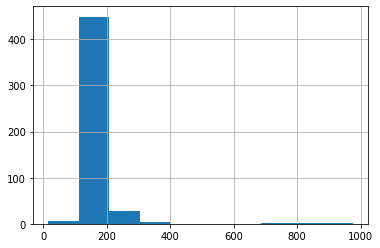

In [93]:
#temp['Weight'].hist()
temp['Height'].hist()
temp.loc[heroes_df['Weight']<600].mean()
len(temp)

In [103]:
#heroes_df['Height']=heroes_df['Height'].replace(-99,heroes_df['Height'].median())
#heroes_df['Weight']=heroes_df['Weight'].replace(-99,np.nan)
#heroes_df_woWeight = heroes_df.drop('Weight',axis = 1)
#heroes_df_wWeight = heroes_df.dropna()
heroes_df_wWeight.describe()

,Height,Weight
count,495.000000,495.000000
mean,187.051919,112.252525
std,58.695056,104.151142
min,15.200000,2.000000
25%,175.000000,61.000000
50%,183.000000,81.000000
75%,188.000000,108.000000
max,975.000000,900.000000


In [107]:
heroes_df_wWeight['Gender'].value_counts()

Male      339
Female    142
Other      14
Name: Gender, dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [109]:
#heroes_df_woWeight = heroes_df_woWeight.set_index('name')
#heroes_df_wWeight = heroes_df_wWeight.set_index('name')
heroes_df_wWeight.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,Unknown,bad,122.0


In [111]:
powers_df = powers_df.set_index('hero_names')
powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [208]:
merged = powers_df.join(heroes_df_woWeight)
merged = merged.reset_index()
#merged.head()
#merged.index.drop(62)
dup_names = (merged[merged.duplicated(subset='index')])['index'].unique()

merged.loc[merged['index'].map(lambda x: any(word == x for word in dup_names))]


,index,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Omnipresent,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment
44,Atlas,False,False,False,False,False,True,True,False,False,...,False,False,Male,brown,Mutant,Red,183.0,Marvel Comics,Unknown,good
45,Atlas,False,False,False,False,False,True,True,False,False,...,False,False,Male,blue,God / Eternal,Brown,198.0,DC Comics,Unknown,bad
62,Batman,True,False,False,False,False,True,True,False,False,...,False,False,Male,blue,Human,black,188.0,DC Comics,Unknown,good
63,Batman,True,False,False,False,False,True,True,False,False,...,False,False,Male,blue,Human,Black,178.0,DC Comics,Unknown,good
90,Black Canary,True,False,False,False,False,False,True,False,False,...,False,False,Female,blue,Human,Blond,165.0,DC Comics,Unknown,good
91,Black Canary,True,False,False,False,False,False,True,False,False,...,False,False,Female,blue,Metahuman,Blond,170.0,DC Comics,Unknown,good
142,Captain Marvel,True,True,False,False,True,True,False,True,True,...,False,False,Female,blue,Human-Kree,Blond,180.0,Marvel Comics,Unknown,good
143,Captain Marvel,True,True,False,False,True,True,False,True,True,...,False,False,Male,blue,Human,Black,193.0,DC Comics,Unknown,good
240,Firestorm,False,False,False,False,False,True,False,True,True,...,False,False,Male,brown,Unknown,Black,180.0,DC Comics,Unknown,good
241,Firestorm,False,False,False,False,False,True,False,True,True,...,False,False,Male,blue,Human,Auburn,188.0,DC Comics,Unknown,good


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

(0, 550)

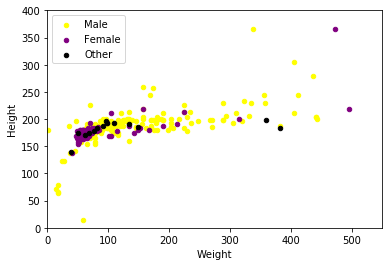

In [125]:
#fem = heroes_df_wWeight[heroes_df_wWeight['Gender'] == "Female"]
#masc = heroes_df_wWeight[heroes_df_wWeight['Gender'] == "Male"]
#other = heroes_df_wWeight[heroes_df_wWeight['Gender'] == "Other"]


scm = masc.plot.scatter('Weight','Height',c="yellow",label='Male')
scf = fem.plot.scatter('Weight','Height',c="purple",label='Female',ax=scm)
sco = other.plot.scatter('Weight','Height',c="black",label='Other',ax=scm)
scm.set_ylim(0,400)
scm.set_xlim(0,550)

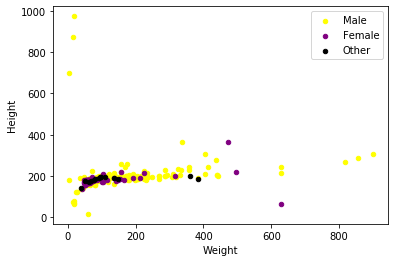

In [126]:
scm = masc.plot.scatter('Weight','Height',c="yellow",label='Male')
scf = fem.plot.scatter('Weight','Height',c="purple",label='Female',ax=scm)
sco = other.plot.scatter('Weight','Height',c="black",label='Other',ax=scm)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [127]:
#male_heroes_df = masc
#female_heroes_df = fem

def show_distplot(dataframe, gender, column_name):
    data_to_plot = dataframe[dataframe['Gender'] == gender]
    sns.distplot(data_to_plot[column_name])
    pass

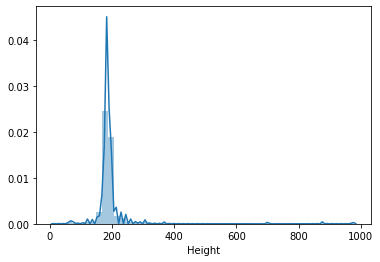

In [128]:
# Male Height
show_distplot(heroes_df_wWeight,"Male",'Height')

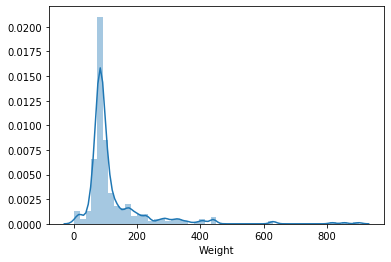

In [129]:
# Male Weight
show_distplot(heroes_df_wWeight,"Male",'Weight')

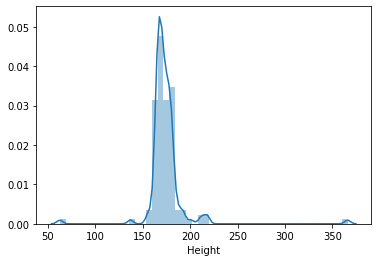

In [131]:
# Female Height
show_distplot(heroes_df_wWeight,"Female",'Height')

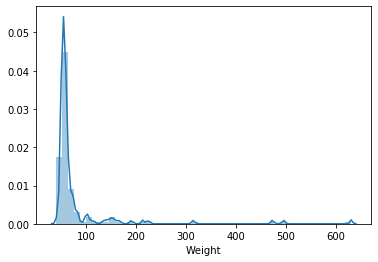

In [130]:
# Female Weight
show_distplot(heroes_df_wWeight,"Female",'Weight')

In [136]:
print(fem.mode())
fem.describe()

   Gender Eye color     Race Hair color  Height      Publisher Skin color  \
0  Female      blue  Unknown      Black   168.0  Marvel Comics    Unknown   

  Alignment  Weight  
0      good    54.0  


,Height,Weight
count,142.000000,142.000000
mean,173.869718,78.838028
std,21.511475,76.975877
min,62.500000,41.000000
25%,168.000000,54.000000
50%,170.000000,58.000000
75%,178.000000,65.000000
max,366.000000,630.000000


In [135]:
print(masc.mode())
masc.describe()

  Gender Eye color   Race Hair color  Height      Publisher Skin color  \
0   Male      blue  Human      Black   183.0  Marvel Comics    Unknown   

  Alignment  Weight  
0      good    79.0  


,Height,Weight
count,339.000000,339.000000
mean,192.782301,125.572271
std,68.751090,110.821822
min,15.200000,2.000000
25%,180.000000,79.000000
50%,185.000000,90.000000
75%,193.000000,122.000000
max,975.000000,900.000000


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

- First of all, already known, but still, now there's numbers, comic books are sexist *as fuck*. Fewer than half as many female data points, and by any metric, female characters are *always* significantly smaller. Only exception is the absolute minimum values, which are outliers-characters who are inhumanly small and light. More male characters means they're more likely to get outlier cases (can also be seen in maximum values).
- Shapes are all fairly similar-large spike around "human average" values, with tails that extend quite far into outlier ranges.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [232]:
power_counts = powers_df.sum()
power_counts.sort_values(ascending=False).head(5)

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [233]:
power_counts_M = merged.loc[merged['Publisher'] == 'Marvel Comics'].drop(['Height'],axis=1)
power_counts_M.drop(['Race','Hair color','Publisher','Skin color','Alignment','Gender','Eye color','index'],axis=1,inplace=True)
power_counts_M = power_counts_M.replace({True:1,False:0}).sum()
power_counts_M
power_counts_M.sort_values(ascending=False).head(5)

Super Strength    194
Stamina           147
Durability        147
Super Speed       131
Agility           122
dtype: int64

In [234]:
power_counts_DC = merged.loc[merged['Publisher'] == 'DC Comics'].drop(['Height'],axis=1)
power_counts_DC.drop(['Race','Hair color','Publisher','Skin color','Alignment','Gender','Eye color','index'],axis=1,inplace=True)
power_counts_DC = power_counts_DC.replace({True:1,False:0}).sum()
power_counts_DC
power_counts_DC.sort_values(ascending=False).head(5)

Super Strength    98
Stamina           82
Flight            77
Super Speed       74
Durability        69
dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
- Fairly similar. Marvel is nearly identical to overall, which makes sense, since they also have a majority of entries. DC likes flight more than durability

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________
Does the relationship of powerset and weight differ by gender? Do the two main publishers show a difference between these? What about other publishers?


Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [245]:
#merged2 = (heroes_df_wWeight.join(powers_df))
#mergedF = merged2[merged2['Gender'] == "Female"]
#mergedM = merged2[merged2['Gender'] == "Male"]

#create bins for weight
Q1 = merged2['Weight'].quantile(.25)
Q2 = merged2['Weight'].median()
Q3 = merged2['Weight'].quantile(.75)

#xs < Q2-1.5(Q3-Q1)
#xs < small < Q1
#small < medium < Q2
#medium < large < Q3
#large < xL < Q2+1.5(Q3-Q1)
#huge > Q2+1.5(Q3-Q1)

def make_bin(weight):
    if weight < Q2-3*(Q3-Q1)/2: return 'xs'
    elif weight < Q1: return 'small'
    elif weight < Q2: return 'medium'
    elif weight < Q3: return 'large'
    elif weight < Q2+3*(Q3-Q1)/2: return 'XL'
    else: return 'HUGE'
    
#merged2['weight_bin'] = merged2['Weight'].map(lambda x: make_bin(x))
merged2['weight_bin'].value_counts()

large     141
medium    115
small     112
HUGE       78
XL         47
xs          2
Name: weight_bin, dtype: int64

In [255]:
merged2.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,weight_bin
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0,False,...,False,False,False,False,False,False,False,False,False,HUGE
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,medium
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,large
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,HUGE
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,Unknown,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,XL


In [296]:
top_30_powers = merged2.drop(['weight_bin','Weight','Height','Race','Hair color','Publisher','Skin color','Alignment','Gender','Eye color'],axis=1)
top_30_powers = top_30_powers.replace({True:1,False:0}).sum()
top_30_powers = top_30_powers.sort_values(ascending=False)
top_30_powers.head(15)

Super Strength         278.0
Stamina                232.0
Durability             211.0
Super Speed            199.0
Agility                196.0
Flight                 157.0
Reflexes               147.0
Accelerated Healing    140.0
Intelligence           118.0
Energy Blasts          113.0
Stealth                 97.0
Marksmanship            93.0
Longevity               93.0
Invulnerability         86.0
Weapons Master          81.0
dtype: float64

In [265]:
def make_df(weight_bin):
    new = merged2.loc[merged2['weight_bin'] == weight_bin]
    new.drop(['weight_bin','Weight','Height','Race','Hair color','Publisher','Skin color','Alignment','Gender','Eye color'],axis=1,inplace=True)
    new = new.replace({True:1,False:0}).sum()
    new = new.sort_values(ascending=False)
    return new

#make_df('small').unique()

weightlst=['xs','small','medium','large','XL','HUGE']
for word in weightlst:
    print(word,'\t count: ',len(merged2.loc[merged2['weight_bin'] == word]),"\n",make_df(word).head(),"\n\n")

xs 	 count:  2 
 Super Strength     2
Intelligence       2
Durability         2
Invulnerability    1
Longevity          1
dtype: int64 


small 	 count:  112 
 Agility           48.0
Super Strength    46.0
Stamina           40.0
Flight            39.0
Super Speed       36.0
dtype: float64 


medium 	 count:  115 
 Super Strength    52.0
Stamina           45.0
Agility           43.0
Durability        42.0
Super Speed       41.0
dtype: float64 


large 	 count:  141 
 Super Strength    71.0
Stamina           62.0
Super Speed       55.0
Agility           54.0
Durability        52.0
dtype: float64 


XL 	 count:  47 
 Super Strength    32.0
Stamina           26.0
Durability        25.0
Super Speed       24.0
Reflexes          20.0
dtype: float64 


HUGE 	 count:  78 
 Super Strength         75.0
Durability             63.0
Stamina                58.0
Super Speed            43.0
Accelerated Healing    35.0
dtype: float64 




In [309]:
df_dict={}
top_15=top_30_powers.head(15).index.values
for weight in weightlst:
    lst=[]
    temp_df = make_df(weight)
    countw = len(merged2.loc[merged2['weight_bin'] == weight])
    for power in top_15:
        lst.append(temp_df[power]/countw)
    df_dict[weight] = lst
    

df = pd.DataFrame(df_dict, index=[top_15])


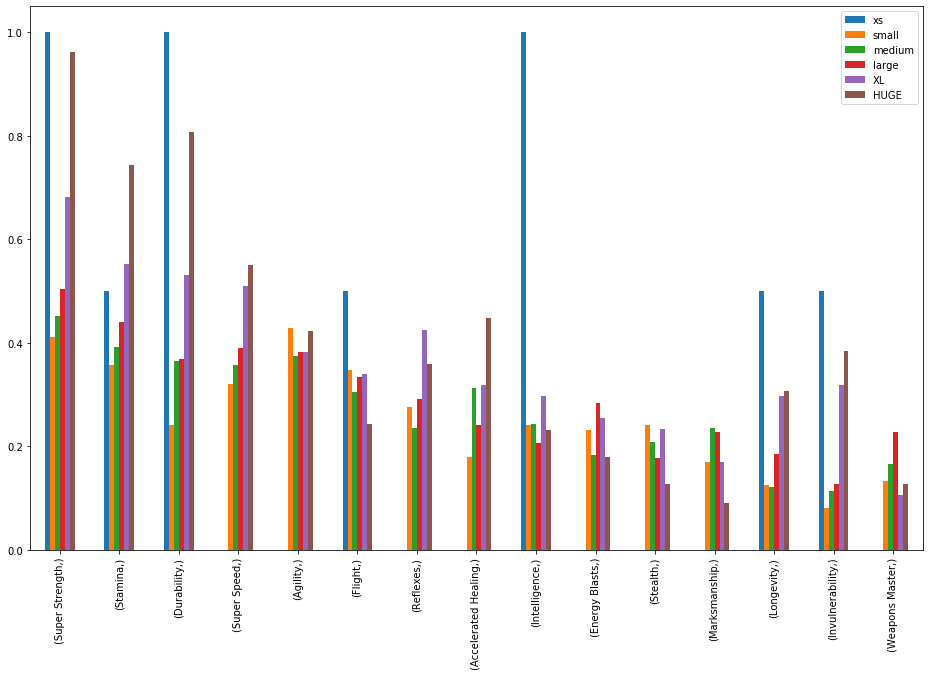

In [310]:
df.plot(kind = 'bar',figsize=(16,10))

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data